In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
from PIL import Image
import cv2
from tqdm import tqdm

tumor_images=os.listdir('/content/drive/MyDrive/Brats/Flair/Yes')
non_tumor_images=os.listdir('/content/drive/MyDrive/Brats/Flair/No')

In [ ]:

tumor_images_n=[]
for tumor_image in tqdm(tumor_images):
  image=cv2.imread((os.path.join('/content/drive/MyDrive/Brats/Flair/Yes',tumor_image)),0)
  image = cv2.resize(image, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
  image=image/255
  tumor_images_n.append(image)
  

100%|██████████| 14079/14079 [1:35:13<00:00,  2.46it/s]


In [ ]:
np.save()

In [ ]:

non_tumor_images_n=[]
for no_tumor_image in tqdm(non_tumor_images):
  image=cv2.imread((os.path.join('/content/drive/MyDrive/Brats/Flair/No',no_tumor_image)),0)
  image = cv2.resize(image, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
  image=image/255
  non_tumor_images_n.append(image)

100%|██████████| 18471/18471 [1:56:57<00:00,  2.63it/s]


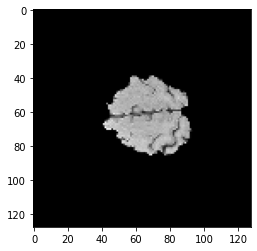

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(non_tumor_images_n[0],'gray')

In [ ]:
masks_path='/content/drive/MyDrive/Brats/BGT'
masks=os.listdir(masks_path)
masks_images=[]
for mask in masks:
  image=cv2.imread((os.path.join('/content/drive/MyDrive/Brats/BGT',mask)),0)
  image = cv2.resize(image, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
  image=image/255
  masks_images.append(image)

In [ ]:
len(masks_images)

In [ ]:
import numpy as np
zeros_masks=np.zeros((18471,128,128,1), dtype=int)

In [ ]:
zeros_masks.shape

(18471, 128, 128, 1)

In [ ]:
import numpy as np
masks_images=np.asarray(masks_images)
masks_images=np.expand_dims(masks_images, axis=3)
non_tumor_images_n=np.asarray(non_tumor_images_n) 
non_tumor_images_n=np.expand_dims(non_tumor_images_n, axis=3)
tumor_images_n=np.asarray(tumor_images_n)
tumor_images_n=np.expand_dims(tumor_images_n, axis=3)

In [ ]:
cd /content/drive/MyDrive/Brats

/content/drive/.shortcut-targets-by-id/1c_-h3mk0AfQVqq30pG7lSZ853_8ye546/Brats


In [ ]:
import numpy as np


np.save('non_tumor_images_n.npy',non_tumor_images_n)
np.save('tumor_images_n.npy',tumor_images_n)
np.save('masks_images.npy',masks_images)


In [ ]:

import numpy as np
masks_images=np.load('masks_images.npy')
non_tumor_images_n=np.load('non_tumor_images_n.npy')
tumor_images_n=np.load('tumor_images_n.npy')

In [ ]:
tumor_images_n.shape

(14079, 128, 128, 1)

In [ ]:
non_tumor_images_n.shape

(18471, 128, 128, 1)

In [ ]:
masks_images.shape

(14079, 128, 128, 1)

In [ ]:
import os
from PIL import Image
import cv2
from tqdm import tqdm

images=np.concatenate((tumor_images_n,non_tumor_images_n),axis=0)

In [ ]:
import numpy as np
masks=np.concatenate((masks_images,zeros_masks),axis=0)

NameError: ignored

In [ ]:
images.shape

(32550, 128, 128, 1)

In [ ]:
masks.shape

In [ ]:
labels=np.append(np.zeros(14079),np.ones(18471))

In [ ]:
masks_images.shape

In [ ]:
from keras.utils import np_utils
labels=np_utils.to_categorical(labels)

In [ ]:
labels.shape

In [ ]:
from scipy.io import loadmat
from skimage import io
from skimage.transform import resize
from sklearn.model_selection import train_test_split
import keras

import pandas as pd
import numpy as np

from os.path import join

import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.display import clear_output

from datetime import datetime
from dateutil.relativedelta import relativedelta
from datetime import timedelta



In [ ]:
import keras
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from keras.utils import plot_model

In [ ]:
import numpy as np 
import os
import skimage.io as io
import skimage.transform as trans
import numpy as np
from keras.models import *
from keras.layers import *
from keras.optimizers import *
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as keras

pretrained_weights = None
input_size = (128,128,1)
inputs = Input(input_size,name='input')
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3)
conv4 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
#Decoder path
conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4)
conv5 = Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))
merge6 = concatenate([drop4,up6], axis = 3)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6)
conv6 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6)

up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7)
conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7)

up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8)
conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8)

up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9)
conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)
				

## Keras Functional API
- This is the main branch
- These layers are common to both the tasks


- This is where the network branches for multiple outputs/tasks
- gender is n x 2 output where as age is n x 1 output

In [ ]:
dense_classification=Flatten()(pool4)
dense_classification=Dense(300)(dense_classification)
classification_output = Dense(2, activation='softmax', name='classification')(dense_classification)
segmentation_output = Conv2D(1,1, activation='sigmoid',name='segmentation')(conv10)

In [ ]:
model = Model(inputs = inputs,
     outputs = [classification_output, segmentation_output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 64) 640         input[0][0]                      
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 64) 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 64)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

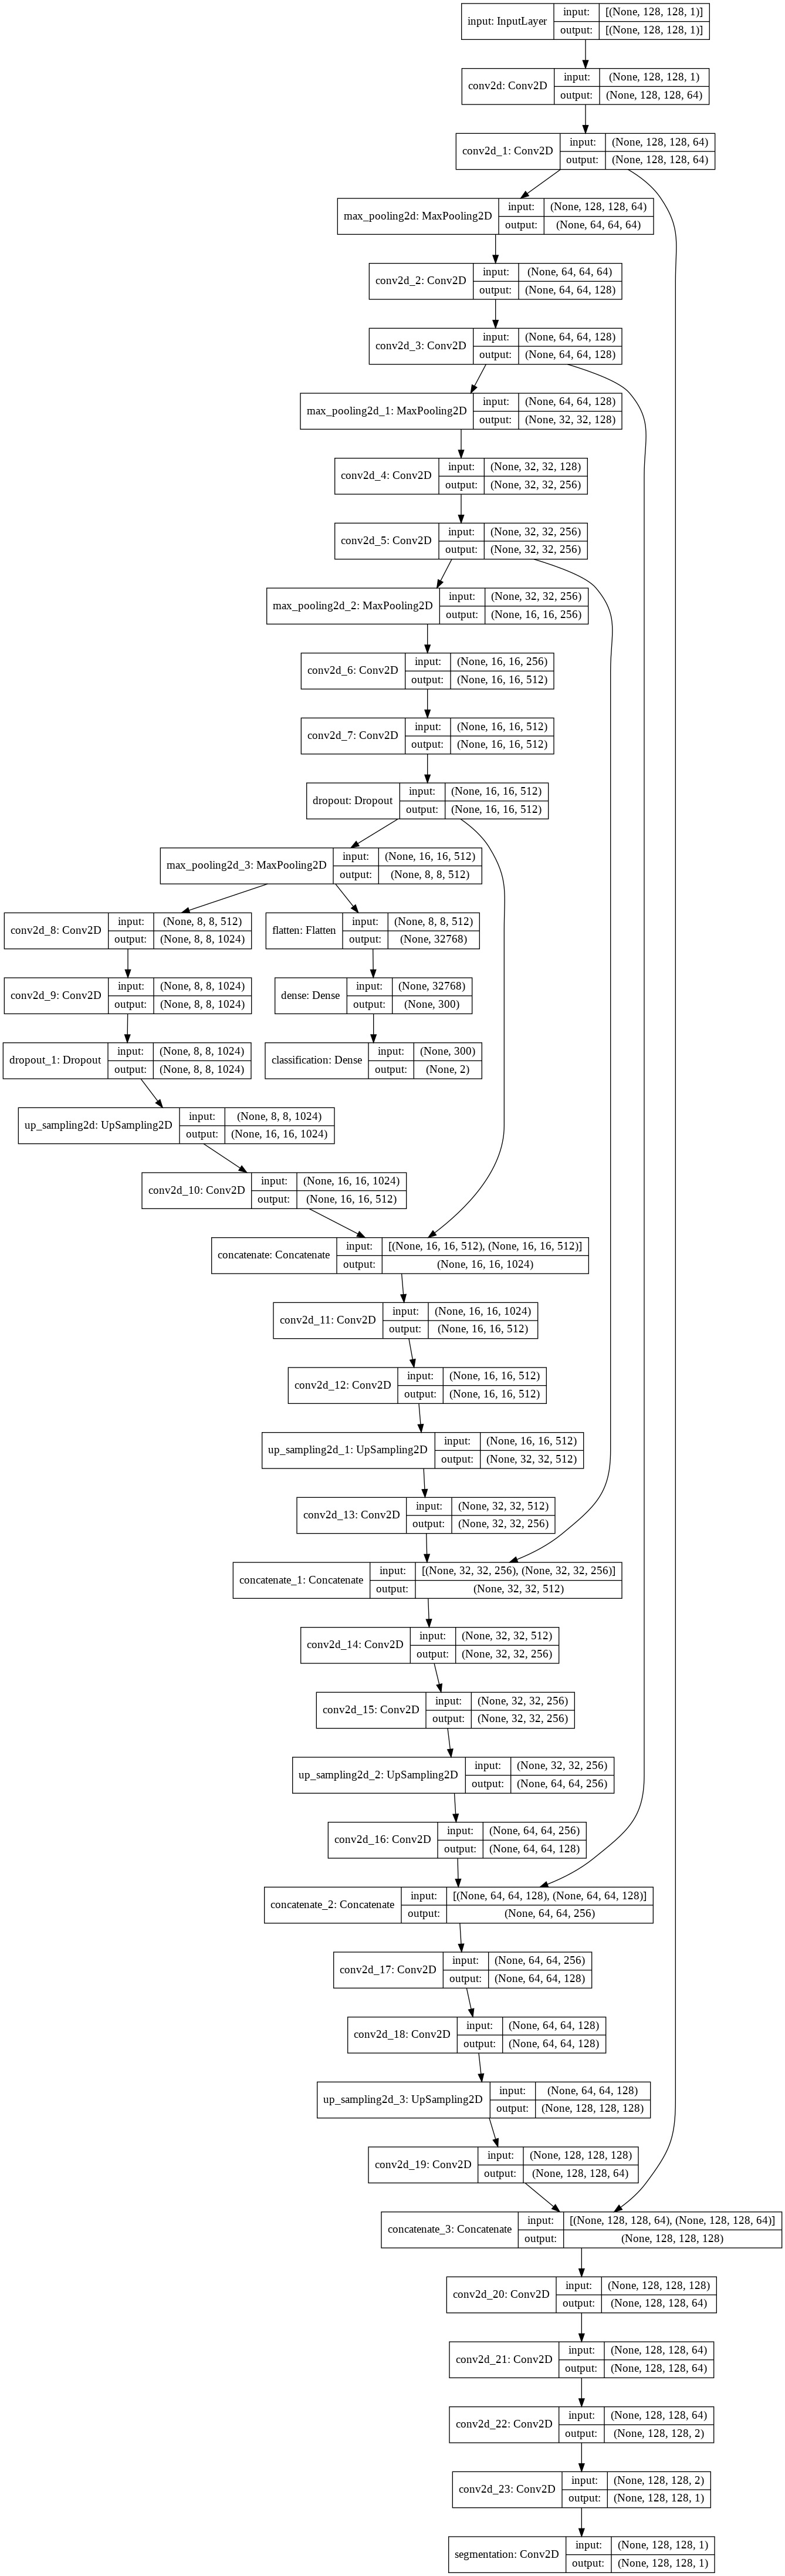

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Multi loss optimizations

- mse for age and cross-entropy for gender
- we can weight these individual losses
- Loss = weight1 * loss1 + weight2 * loss2

In [ ]:
import keras
opt = keras.optimizers.RMSprop(lr=1e-3)
model.compile(optimizer='rmsprop',
              loss={'classification': 'categorical_crossentropy', 'segmentation': 'binary_crossentropy'},
              loss_weights={'classification': 0.1, 'segmentation': 0.1},metrics=['accuracy'])

In [ ]:
try:
    history = model.fit({'input': images},
              {'classification': labels, 'segmentation': masks},
              epochs=50, batch_size=30,
              verbose=1,
              validation_split=0.2
             )
except KeyboardInterrupt:
    pass

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['classification_accuracy'])
plt.plot(history.history['val_classification_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['classification_loss'])
plt.plot(history.history['val_classification_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
labels.shape

(265, 2)

In [ ]:
masks_images.shape

(155, 128, 128, 1)

In [ ]:
images.shape

(265, 128, 128, 1)

In [ ]:
#################################### MY ADDITION FOR CHECKPOINT ANMD SAVING MODEL ########################################## 
#Checkpoint callback usage

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[cp_callback])  # Pass callback to training


In [ ]:
#Loads the weights
model.load_weights(checkpoint_path)

# Re-evaluate the model
loss, acc = model.evaluate(test_images, test_labels, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

In [ ]:
#Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('saved_model/my_model')

In [ ]:
#Reload a fresh Keras model from the saved model:
new_model = tf.keras.models.load_model('saved_model/my_model')